### Import Packages

In [3]:
import requests
import pandas as pd
import geopandas as gpd
from IPython.display import display, IFrame
import matplotlib.pyplot as plt

In [8]:
# Specify the URL of the webpage you want to display
url = "https://statsgeoportal.dosm.gov.my/gisportal/home/webmap/viewer.html?featurecollection=https%3A%2F%2Fmaps.dosm.gov.my%2Fdosm%2Frest%2Fservices%3Ff%3Djson%26option%3Dfootprints&supportsProjection=true&supportsJSONP=true"

# Set the width and height of the iframe
width = "100%"
height = "400px"

# Embed the webpage within an iframe and display it
display(IFrame(url, width=width, height=height))

### Getting Response From Query link and Display

In [4]:
response = requests.get(f'https://gis.dukcapil.kemendagri.go.id/arcgis/rest/services/Data_Baru_26092017/MapServer/2/query?f=json&where=&returnGeometry=true&spatialRel=esriSpatialRelIntersects&objectIds=7224&outFields=*&outSR=102100')
geojson = response.text
geojson[0:1000]

'{"displayFieldName":"giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.kode_siak","fieldAliases":{"giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.objectid_1":"objectid_1","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.objectid":"objectid","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.kode_siak":"kode_siak","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.nama_siak":"nama_siak","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.kode_2017":"kode_2017","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.nama_2017":"nama_2017","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.luas":"luas","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.objectid":"OID","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.no_prop":"no_prop","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.no_kab":"no_kab","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.no_kec":"no_kec","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.kode_prov_":"kode_prov_","giskemendagri.gisadmin.Kecamatan_Tabe

### Modify the objectid and retrive all data

In [7]:
Starting_objectid_number = 7224
Ending_objectid__number = 14502
total_polygons = 7280

filename = 1
object_id = 7224


for each in range(7280):
    request = f'https://gis.dukcapil.kemendagri.go.id/arcgis/rest/services/Data_Baru_26092017/MapServer/2/query?f=json&where=&returnGeometry=true&spatialRel=esriSpatialRelIntersects&objectIds={object_id}&outFields=*&outSR=102100'
    object_id+=1
    response = requests.get(request)
    geojson = response.text
    gdft = gpd.read_file(geojson)
    path = f'/home/lohitd@nextbillion.ai/Downloads/ID/{filename}.geojson'
    gdft.to_file(path, driver='GeoJSON')
    filename+=1

# Collate all geojsons into one

In [21]:
filename = 2

for each in range(7279):
    gdf_read = gpd.read_file(f'/home/lohitd@nextbillion.ai/Downloads/ID/{filename}.geojson')
    complete_indonesia = pd.concat([complete_indonesia,gdf_read], axis=0)
    filename+=1

In [76]:
complete_indonesia_shp = complete_indonesia[["giskemendagri.gisadmin.Kecamatan_Tabel_26092017.nama_prop_","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.nama_kab_s","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.nama_siak","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.kode_kec_s","geometry"]]
complete_indonesia_shp = complete_indonesia_shp.rename(columns={"giskemendagri.gisadmin.Kecamatan_Tabel_26092017.nama_prop_":"level_1","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.nama_kab_s":"level_2","giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.nama_siak":"division_name","giskemendagri.gisadmin.Kecamatan_Tabel_26092017.kode_kec_s":"division_id"})

complete_indonesia_shp['region'] = "ID"
complete_indonesia_shp['division_level'] = "3"
complete_indonesia_shp['level_0'] = "Indonesia"
complete_indonesia_shp['province_city'] = complete1['level_1'] + ", " + complete1['level_2']

In [25]:
complete_indonesia.to_file('./id.geojson', driver ='GeoJSON')
complete_indonesia.to_file('./id1.shp')

# Final Data

In [7]:
complete_indonesia = gpd.read_file("id.geojson")
complete_indonesia.head(3)

,giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.objectid_1,giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.objectid,giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.kode_siak,giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.nama_siak,giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.kode_2017,giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.nama_2017,giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.luas,giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.data,giskemendagri.gisadmin.Kecamatan_Tabel_26092017.objectid,giskemendagri.gisadmin.Kecamatan_Tabel_26092017.no_prop,...,giskemendagri.gisadmin.Kecamatan_Tabel_26092017.lahir_thn4,giskemendagri.gisadmin.Kecamatan_Tabel_26092017.lahir_thn5,giskemendagri.gisadmin.Kecamatan_Tabel_26092017.lahir_thn6,giskemendagri.gisadmin.Kecamatan_Tabel_26092017.lahir_seb4,giskemendagri.gisadmin.Kecamatan_Tabel_26092017.lahir_seb5,giskemendagri.gisadmin.Kecamatan_Tabel_26092017.lahir_seb6,giskemendagri.gisadmin.Kecamatan_Tabel_26092017.pertumbuh4,giskemendagri.gisadmin.Kecamatan_Tabel_26092017.pertumbuh5,giskemendagri.gisadmin.Kecamatan_Tabel_26092017.jml_rek_wktp,geometry
0,7224,NaN,,DANAU,NaN,_,NaN,Data Baru,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((10986187.338 290376.963, 10986..."
1,7225,NaN,,SUNGAI KAKAP,NaN,_,NaN,Data Baru,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((12160218.348 -4319.197, 121602..."
2,7226,NaN,<Null>,DANAU,NaN,_,NaN,Data Baru,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((13429549.973 -197167.081, 1342..."


In [28]:
complete_indonesia.shape

(7280, 236)

In [33]:
# Function to count polygons within a geometry
def count_polygons(geometry):
    if geometry.geom_type == 'Polygon':
        return 1
    elif geometry.geom_type == 'MultiPolygon':
        return len(geometry.geoms)
    else:
        return 0

# Count polygons in each GeoDataFrame
count_merged = sum(complete_indonesia['geometry'].apply(count_polygons))

print(f"Total extracted polygons in Indonesia: {count_merged}")

Total extracted polygons in Indonesia: 28153


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


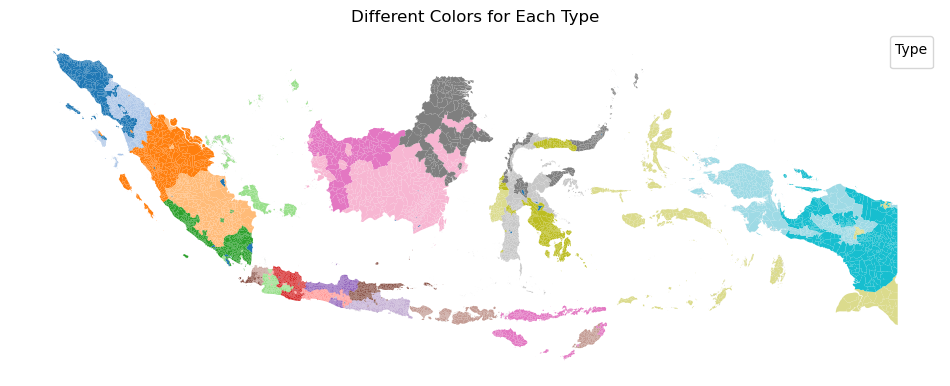

In [24]:
# Create a unique color for each unique type in the specified column
unique_types = complete_indonesia['giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.objectid_1'].unique()
num_colors = len(unique_types)
colors = plt.cm.get_cmap('tab20', num_colors)

# Create a dictionary to map types to colors
type_to_color = {t: colors(i) for i, t in enumerate(unique_types)}

# Plot the GeoDataFrame with different colors for each type
fig, ax = plt.subplots(figsize=(12, 12))
for t, color in type_to_color.items():
    complete_indonesia[complete_indonesia['giskemendagri.gisadmin.Kecamatan_Spasial_22092017_2.objectid_1'] == t].plot(ax=ax, color=color, label=t)

# Add a legend
ax.legend(title='Type')
plt.title('Different Colors for Each Type')
plt.axis('off')  # Turn off the axis
plt.show()